In [97]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [4]:
excelbook = pd.ExcelFile('Attrition Problem.xlsx')

dframe = excelbook.parse('Sheet1')

# Descriptive Analysis

In [5]:
dframe.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [15]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [6]:
dframe.groupby('left').mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,,
0,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


It seems that employees who have left have lower satisfaction level, did more projects, worked more average monthly hours, spent more time at the company, have low work accidents and little or no promotion in the last five years. 

 

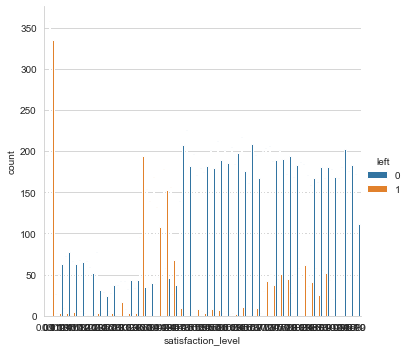

In [8]:
# visualizing effect of satisfaction level
sns.catplot('satisfaction_level', data=dframe, hue='left', kind='count')

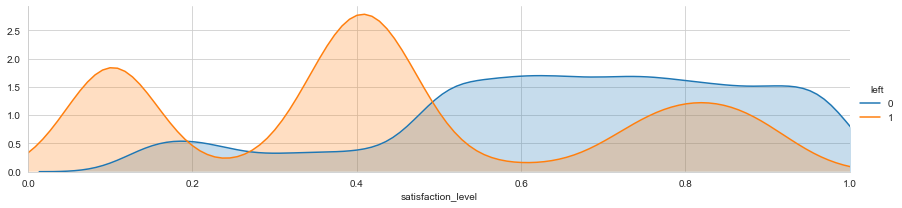

In [22]:
fig =sns.FacetGrid(dframe, hue='left', aspect=4)
fig.map(sns.kdeplot, 'satisfaction_level', shade=True)

longest =dframe['satisfaction_level'].max()
fig.set(xlim=(0,longest))

fig.add_legend()

It can be seen that those with lower satisfactory level left

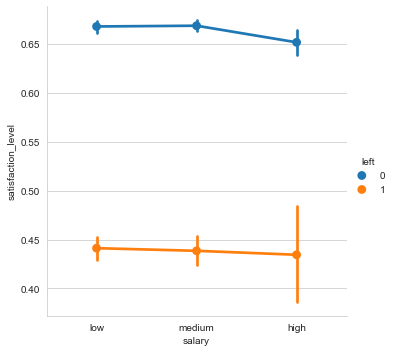

In [30]:
sns.catplot( 'salary','satisfaction_level', data=dframe, hue='left', kind='point')

Clearly employees with low satisfaction level left, not minding the salary

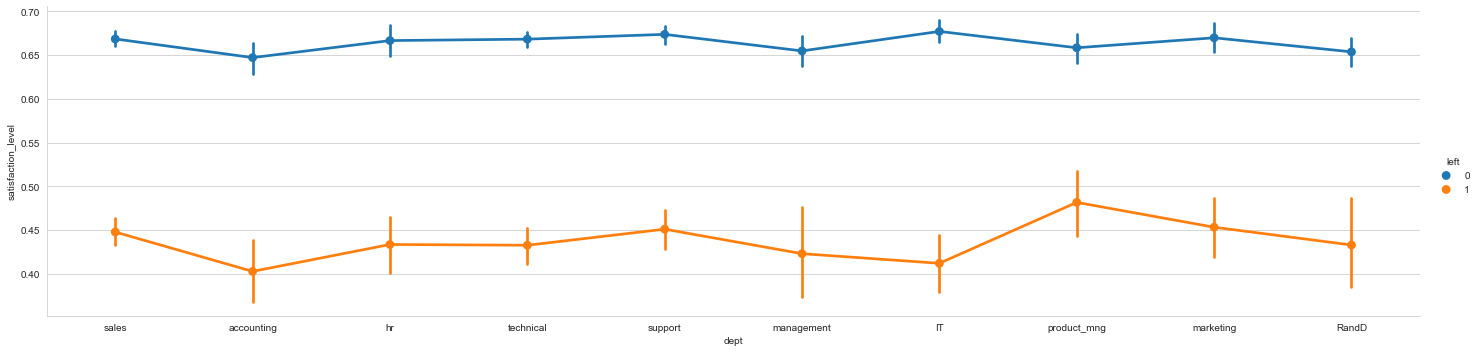

In [32]:
sns.catplot( 'dept','satisfaction_level', data=dframe, hue='left', kind='point', aspect =4)

Clearly employees with low satisfaction level left, not minding their department

#### Employees with low satisfaction level left

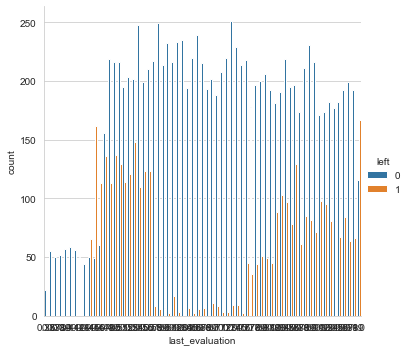

In [9]:
# visualizing effect of last evaluation
sns.catplot('last_evaluation', data=dframe, hue='left', kind='count')

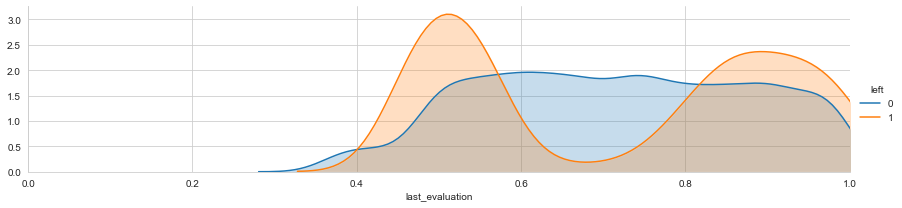

In [23]:
fig =sns.FacetGrid(dframe, hue='left', aspect=4)
fig.map(sns.kdeplot, 'last_evaluation', shade=True)

longest =dframe['last_evaluation'].max()
fig.set(xlim=(0,longest))

fig.add_legend()

It shows that those with high last valuation and low last valuation left.

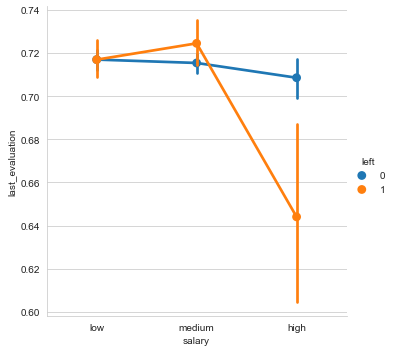

In [34]:
sns.catplot('salary','last_evaluation', data=dframe, hue='left', kind='point')

Employees with high evaluations and low or medium salary have left. Also, employees with high salary but low last evaluation are no longer in the company

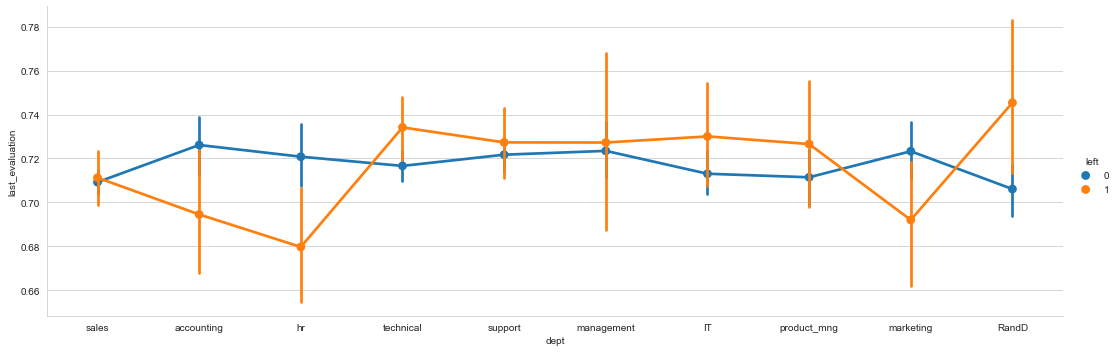

In [41]:
sns.catplot('dept','last_evaluation', data=dframe, hue='left', kind='point', aspect=3)

No clear pattern. In some departments (accounting, hr, marketing) those with higher evaluation left while in some departments, those with lower valuation left. However, in most departments, those with higher evaluation left. 

#### Employees with high last evaluation and low salary left

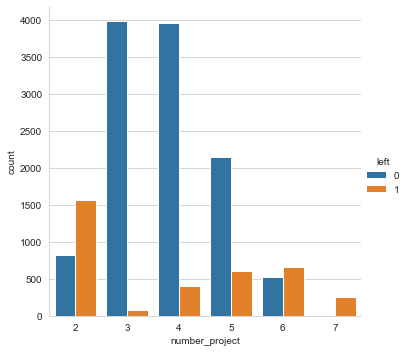

In [10]:
sns.catplot('number_project', data=dframe, hue='left', kind='count')

Employees with small number of projects (less than three projects) left. They might not be motivated enough

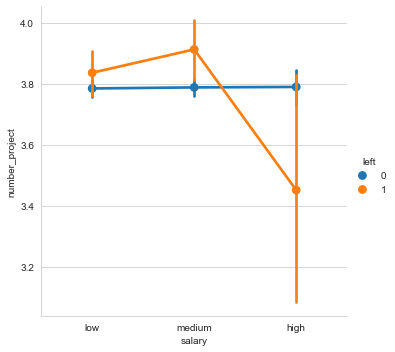

In [50]:
sns.catplot('salary','number_project', data=dframe, hue='left', kind='point')

Employees handling less projects left, not minding the high salary

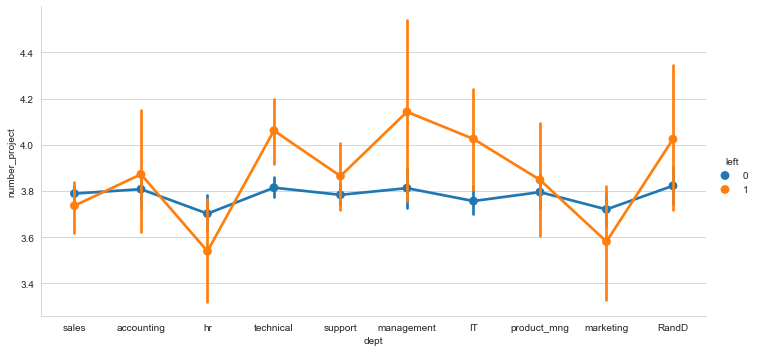

In [48]:
sns.catplot('dept','number_project', data=dframe, hue='left', kind='point', aspect=2)

Employees handling higher number of project left in most departments

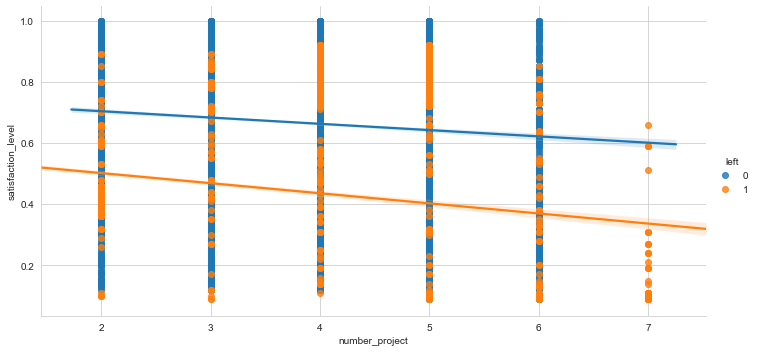

In [57]:
sns.lmplot(y='satisfaction_level',x='number_project', data=dframe, hue='left', aspect=2)

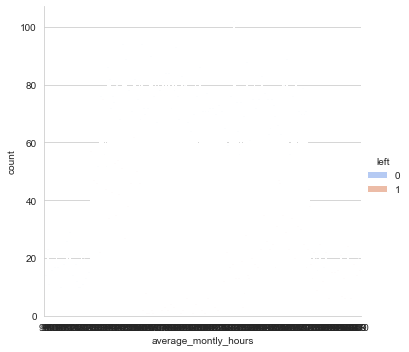

In [19]:
sns.catplot('average_montly_hours', data=dframe, hue='left', kind='count', palette='coolwarm')

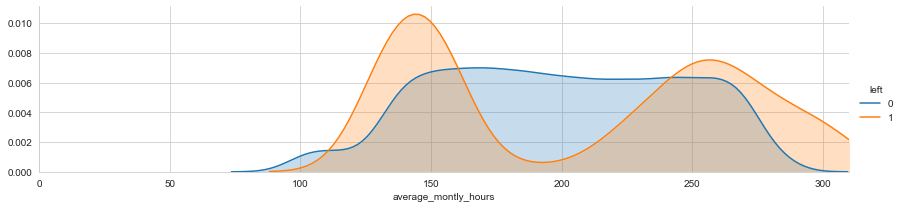

In [21]:
fig =sns.FacetGrid(dframe, hue='left', aspect=4)
fig.map(sns.kdeplot, 'average_montly_hours', shade=True)

longest =dframe['average_montly_hours'].max()
fig.set(xlim=(0,longest))

fig.add_legend()

Employees with very high average monthly hours and very low average working hourse left.

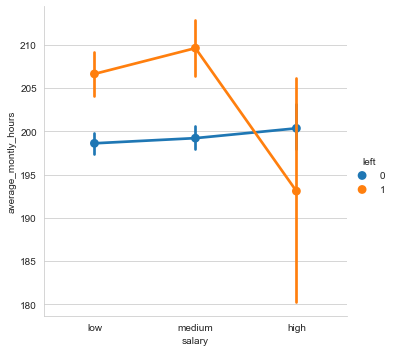

In [43]:
sns.catplot('salary','average_montly_hours', data=dframe, hue='left', kind='point',)

 Employees with high average monthly hours and low salary left

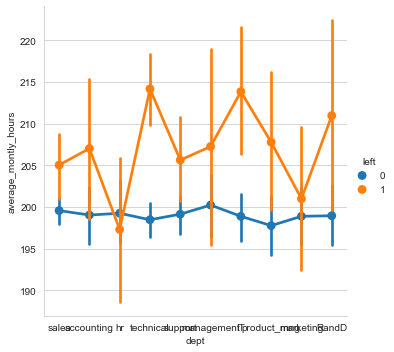

In [44]:
sns.catplot('dept','average_montly_hours', data=dframe, hue='left', kind='point',)

Employees with higher average working time are leaving.

#### Employees with high average montly hourse and low salary left

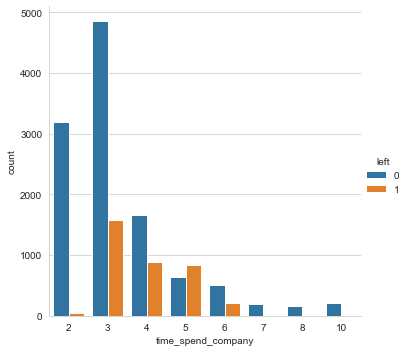

In [24]:
sns.catplot('time_spend_company', data=dframe, hue='left', kind='count')

#### This shows that starting from year 3, employees started to leave the company

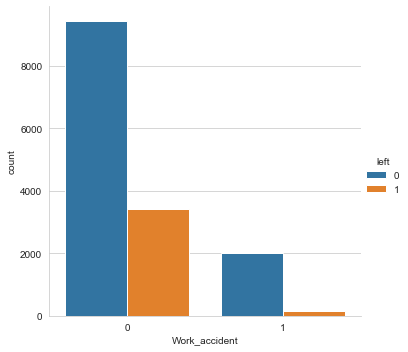

In [25]:
sns.catplot('Work_accident', data=dframe, hue='left', kind='count')

Employees that left do not have work accident. So this is not a factor for them leaving

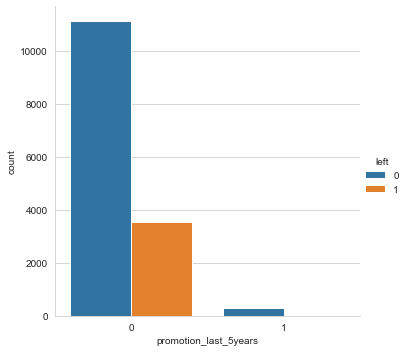

In [26]:
sns.catplot('promotion_last_5years', data=dframe, hue='left', kind='count')

#### Clearly, employees who were not promoted in the last five years left

### Summary of findings
Those that will leave:
Employees who have spent a minimum of 3 years and are experiencing the following:
1. Employees that do not have promotion for the last five years.
2. Employees with higher average work time and low salary
3. Employees with lower satisfactory level


Segmenting the data of Employees that have left

In [67]:
excelbook = pd.ExcelFile('Attrition Problem.xlsx')

dframe_left = excelbook.parse('Employees who have left')

dframe_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [68]:
dframe_left.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


Employees who have left seems to be those who have low satisfaction levels, high last evaluation, those that have handled almost 4 projects, have high average montly hours, spent almost four years in the company, dont have accident and who havent had promotion in the last five years 

In [69]:
dframe_left.corr()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Emp ID,1.000000,0.000791,-0.016324,-0.013354,-0.009820,-0.001109,-0.024144,0.016686
satisfaction_level,0.000791,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,0.005516
last_evaluation,-0.016324,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,-0.047992
number_project,-0.013354,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,-0.032301
average_montly_hours,-0.009820,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,-0.035475
time_spend_company,-0.001109,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,-0.045888
Work_accident,-0.024144,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,0.056214
promotion_last_5years,0.016686,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,1.000000


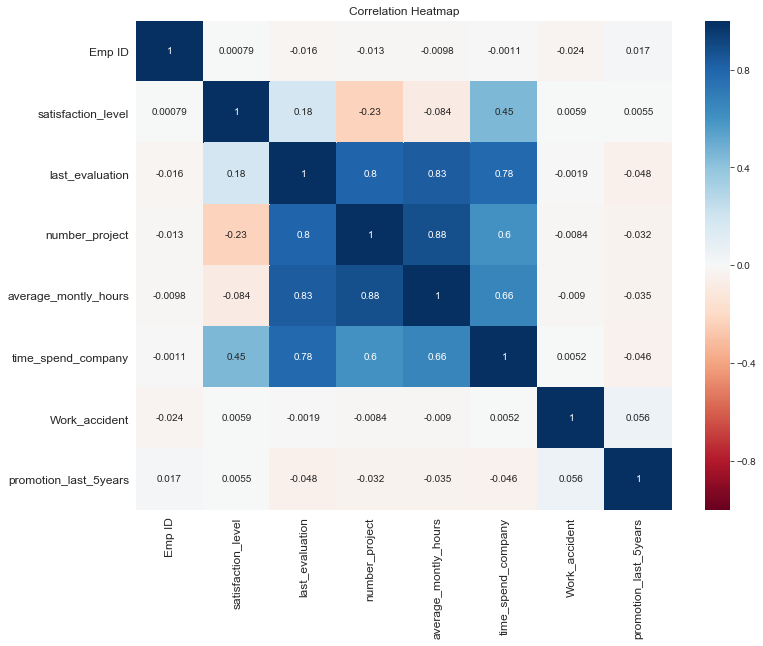

In [71]:
plt.figure(figsize=(12,9))
s=sns.heatmap(dframe_left.corr(),
             annot = True,
             cmap="RdBu",
             vmin=-1,
             vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

There is a negative relationship between satisfaction level and average monthly hours and number of projects. The two visulaization that follows shows this

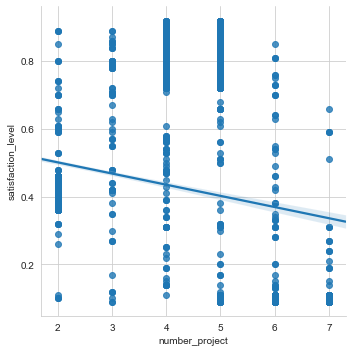

In [75]:
sns.lmplot(x='number_project', y='satisfaction_level', data= dframe_left)

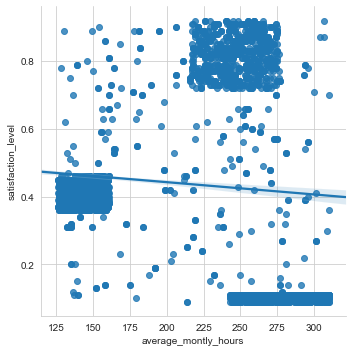

In [76]:
sns.lmplot(x='average_montly_hours', y='satisfaction_level', data= dframe_left)

In [78]:
# preparing data for clustering analysis


dept_dummies_left = pd.get_dummies(dframe_left['dept'])
dept_dummies_left.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [79]:
salary_dummies_left = pd.get_dummies(dframe_left['salary'])
salary_dummies_left.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [80]:
dummies_left = pd.concat([dept_dummies,salary_dummies],axis=1)
dummies_left.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [81]:
segmentation_df = dframe_left [['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
segmentation_df = pd.concat([segmentation_df, dummies_left], axis=1)
segmentation_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [83]:
# to correct for multicollinerity

segmentation_df = segmentation_df.drop('IT', axis=1)
segmentation_df = segmentation_df.drop('medium', axis=1)
segmentation_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1


In [84]:
#standadizing the data for employees that have left

scaler_left =StandardScaler()
left_std = scaler_left.fit_transform(segmentation_df)

In [90]:
# reducing dimentions with pricipal component analysis
pca = PCA()


In [92]:
pca.fit(segmentation_df.dropna())

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [94]:
pca.explained_variance_ratio_

array([9.99342881e-01, 2.09363382e-04, 1.52217951e-04, 7.12499748e-05,
       5.90536621e-05, 4.53986798e-05, 2.68146527e-05, 1.57575585e-05,
       1.51277083e-05, 1.48967276e-05, 1.20634228e-05, 9.81237691e-06,
       7.68184298e-06, 6.93044048e-06, 5.69711279e-06, 1.95673103e-06,
       1.71821742e-06, 1.37872747e-06])

Text(0, 0.5, 'cummulative explained variance')

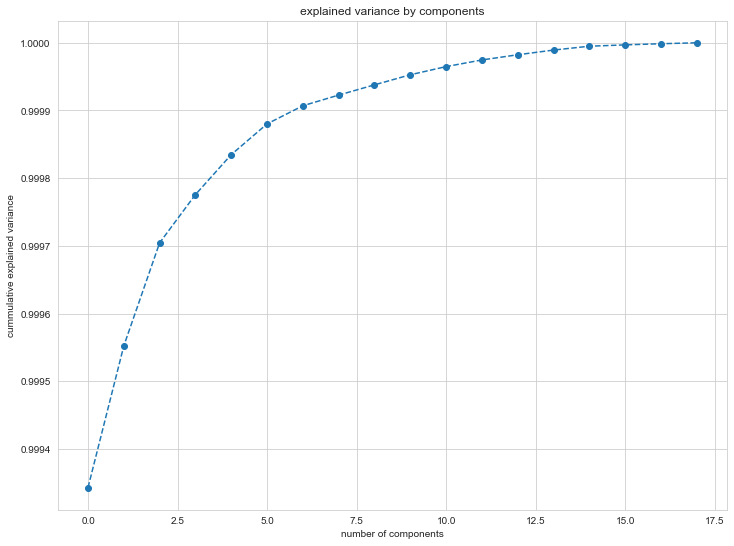

In [96]:
plt.figure(figsize=(12,9))
plt.plot( pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')

pca shows 2 or 5 components should be used.


In [101]:
pca =PCA(n_components=2)

In [103]:
pca.fit(segmentation_df.dropna())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [104]:
pca.components_

array([[-3.62748615e-04,  2.68108456e-03,  2.59947381e-02,
         9.99602052e-01,  1.06049593e-02, -3.13786599e-05,
        -4.21627847e-05,  3.21907035e-05, -5.94641826e-06,
        -1.62545356e-04, -1.01425958e-06, -9.75934409e-05,
         5.46774643e-06, -1.80387472e-04, -7.38864229e-05,
         3.52502284e-04, -8.77935419e-05, -1.27931477e-04],
       [-8.05249881e-02,  4.07571893e-02,  9.88296645e-01,
        -2.70475986e-02,  1.12927923e-01,  1.56833885e-04,
        -4.64297178e-04,  4.10619962e-03,  1.91800910e-03,
        -4.10547951e-03,  9.42765197e-03, -7.57296311e-03,
        -2.09960700e-04, -3.21393118e-02,  1.67595775e-02,
         1.18520745e-02, -1.01498722e-03,  8.95152760e-04]])

In [106]:
df_pca_comp=pd.DataFrame(data=pca.components_,
                        columns=segmentation_df.columns.values,
                        index=['Component 1', 'Component 2'])
df_pca_comp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low
Component 1,-0.000363,0.002681,0.025995,0.999602,0.010605,-0.000031,-0.000042,0.000032,-0.000006,-0.000163,-0.000001,-0.000098,0.000005,-0.000180,-0.000074,0.000353,-0.000088,-0.000128
Component 2,-0.080525,0.040757,0.988297,-0.027048,0.112928,0.000157,-0.000464,0.004106,0.001918,-0.004105,0.009428,-0.007573,-0.000210,-0.032139,0.016760,0.011852,-0.001015,0.000895


In [108]:
scores_pca=pca.transform(segmentation_df.dropna())

In [110]:
# find clusters with k-means

wcss =[]
for i in range(1,11):
    kmeans_pca =KMeans(n_clusters = i, init ="k-means++", random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

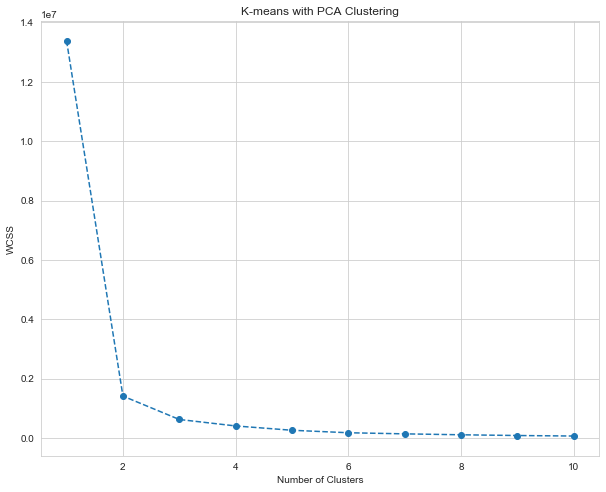

In [111]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker= 'o', linestyle ="--")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

k-means indicates that the number of clusters is 2

To confirm this, a hierchical clustring is done

In [99]:
# dendogram
hier_clust = linkage(segmentation_df.dropna(), method="ward")

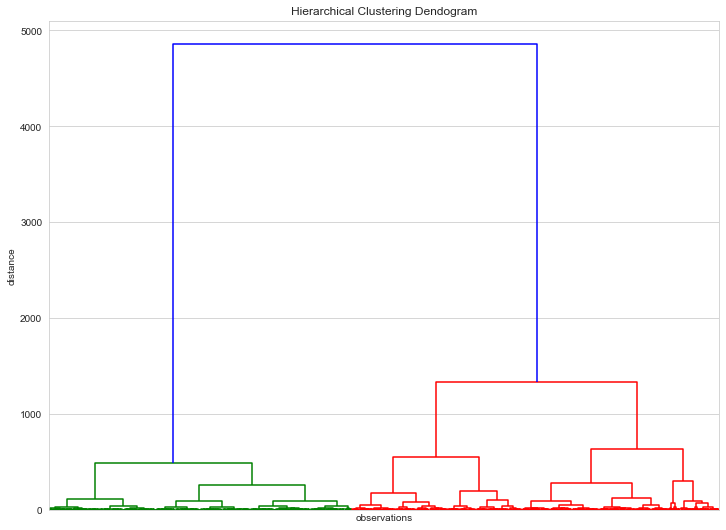

In [100]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel('observations')
plt.ylabel('distance')
dendrogram(hier_clust,
           
         show_leaf_counts=False,
         no_labels=True,)
plt.show()


Hierachical clustering also shows that the number of clusters are 2. 

In [112]:
kmeans_pca=KMeans(n_clusters=2, init="k-means++", random_state = 42)

In [113]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [117]:
#displaying the result of the clustering 
df_segm_pca_kmeans = pd.concat([segmentation_df.dropna().reset_index(drop = True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-2:] =['Component 1', 'Component 2']
df_segm_pca_kmeans['Segment K-means PCA']= kmeans_pca.labels_

In [118]:
df_segm_pca_kmeans

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,...,marketing,product_mng,sales,support,technical,high,low,Component 1,Component 2,Segment K-means PCA
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,-50.457376,-0.599240,0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,54.611499,-0.156830,1
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,64.638603,1.379809,1
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,15.616342,0.792843,1
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,-48.458195,-0.652937,0
5,0.41,0.50,2.0,153.0,3.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,-54.455875,-0.494688,0
6,0.10,0.77,6.0,247.0,4.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,39.622138,1.064920,1
7,0.92,0.85,5.0,259.0,5.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,51.601890,-0.197790,1
8,0.89,1.00,5.0,224.0,5.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,16.616231,0.757405,1
9,0.42,0.53,2.0,142.0,3.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,-65.451421,-0.196747,0


In [119]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,Component 1,Component 2
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,
0,0.417052,0.532128,2.191682,145.283906,3.079566,0.047619,0.009042,0.030741,0.058469,0.070524,0.023508,0.062688,0.053647,0.295961,0.157324,0.17601,0.030139,0.619048,-62.162784,-0.060155
1,0.460094,0.879487,5.299163,261.332636,4.567992,0.047071,0.002092,0.036611,0.055962,0.051255,0.027197,0.051778,0.057008,0.273536,0.153766,0.21182,0.016736,0.598849,53.937269,0.052195


#### Segment 0 have lower satisfaction level, lower last valuation, lower number of projects, lower average montly hours, higher salaries when compared to segment 1.
#### Both segment 1 and segment 2 have not received promotions in the last five years, have worked for at least 3 years and have satisfaction levels lowes than 0.5.
Therefore, segment 0 and segment 1 can be said to consist of low performers and high performers respectively


In [120]:
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans["Segment K-means PCA"].map({0:'low performers',
                                                        1:'high performers'})

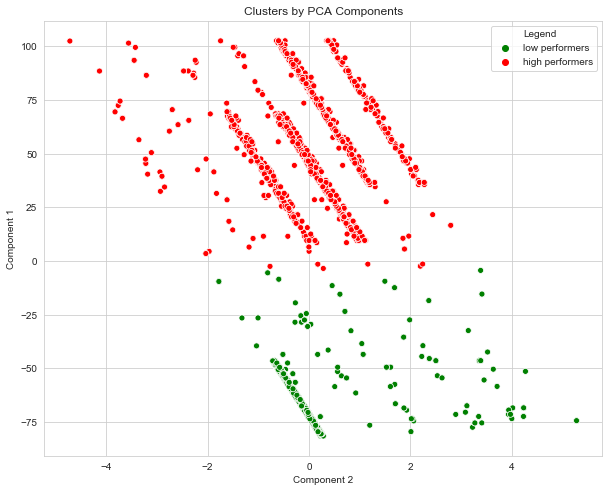

In [121]:
#plotting 
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette =['g','r'])
plt.title('Clusters by PCA Components')
plt.show()

It can be seen that the clusters are distinct. 

### Summary of Finding:
Those who have left are those who have not received promotions in the last five years and have a low satiafactory score of 0.5. They can be grouped into two groups:

1. Those who have low number of projects, work fewer times, have low valuations but receive high salaries. These are called low performers. Most likely they might have been sacked or left due to non-performance.

2. Those who have higher number of projects, work longer times, have high valuations but receive low salaries. These are high performers. Most likely they got better offers somewhere else. 


# Data Prepation and Preprocessing for Predictive Analysis

In [59]:
# Converting the categorical variables of dept and salary to numerical variables

dept_dummies = pd.get_dummies(dframe['dept'])
dept_dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [122]:
salary_dummies = pd.get_dummies(dframe['salary'])
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [123]:
dummies = pd.concat([dept_dummies,salary_dummies],axis=1)
dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [124]:
# specify the features 
X = dframe [['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
X = pd.concat([X, dummies], axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [125]:
# specify the target
Y = dframe[['left']]
Y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [132]:
# converting Y into a one dimentional array
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Predictive Analysis Using the Logistic Regression

In [136]:
log_model = LogisticRegression()
log_model.fit(X,Y)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df 

,0,1
0,satisfaction_level,[-4.076444444977652]
1,last_evaluation,[0.7336353874653104]
2,number_project,[-0.31094392246296376]
3,average_montly_hours,[0.004407646301886047]
4,time_spend_company,[0.26531931855199614]
5,Work_accident,[-1.5120540597041714]
6,promotion_last_5years,[-1.168918090678208]
7,IT,[-0.10569068781970549]
8,RandD,[-0.5000163797482146]
9,accounting,[0.07097385418545157]


#### This shows that employees who have high evaluations, high average monthly hours, spent more than 2 years but have low or medium salaries are likely to leave

In [139]:
# building the training and testsing set for the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [140]:
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
# Predict using the test data set
Y_predict = log_model2.predict(X_test)

# Compare the predicted Y-values to the actual/test Y-test values
print (metrics.accuracy_score(Y_test,Y_predict))

0.7845333333333333


The model is 78.45% accurate in predicting employees who are going to leave

# Checking with Random Forests

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
rfr_model = RandomForestRegressor()

In [146]:
rfr_model.fit(X_train, Y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [147]:
Y_pred = rfr_model.predict(X_test)

In [148]:
print (metrics.accuracy_score(Y_test,Y_predict))

0.7845333333333333


Same accuracy with our the model built. Thus the model is okay